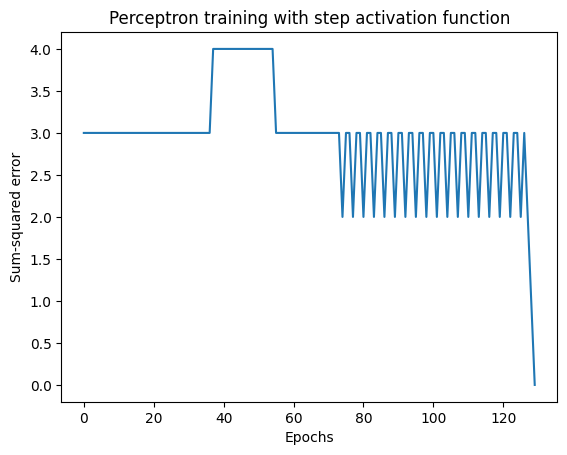

Converged in 130 epochs.
Learned Weights: [-0.1   0.1   0.05]


In [76]:
#A1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Training data for the AND gate
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_targets = np.array([0, 0, 0, 1])

# Function for the step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Initialize the perceptron weights
weights = np.array([W0, W1, W2])

# Training loop to learn the weights
epochs = []
errors = []
converged = False
max_epochs = 1000  # Maximum number of epochs to avoid infinite loop

for epoch in range(max_epochs):
    error_sum = 0

    for i, input_data in enumerate(training_inputs):
        # Compute the weighted sum
        weighted_sum = np.dot(input_data, weights[1:]) + weights[0]

        # Apply step activation function
        prediction = step_function(weighted_sum)

        # Update the weights
        error = training_targets[i] - prediction
        weights[1:] += learning_rate * error * input_data
        weights[0] += learning_rate * error

        error_sum += error ** 2

    epochs.append(epoch)
    errors.append(error_sum)

    # Check for convergence (no errors)
    if error_sum == 0:
        converged = True
        break

# Plot the epochs against the error values
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared error')
plt.title('Perceptron training with step activation function')
plt.show()

# Output
if converged:
    print(f"Converged in {len(epochs)} epochs.")
    print("Learned Weights:", weights)
else:
    print("Maximum number of epochs reached. The perceptron did not converge.")



Step: Maximum number of epochs reached. The perceptron did not converge.
Bi-Polar Step: Converged in 68 epochs.
Sigmoid: Maximum number of epochs reached. The perceptron did not converge.
ReLU: Maximum number of epochs reached. The perceptron did not converge.


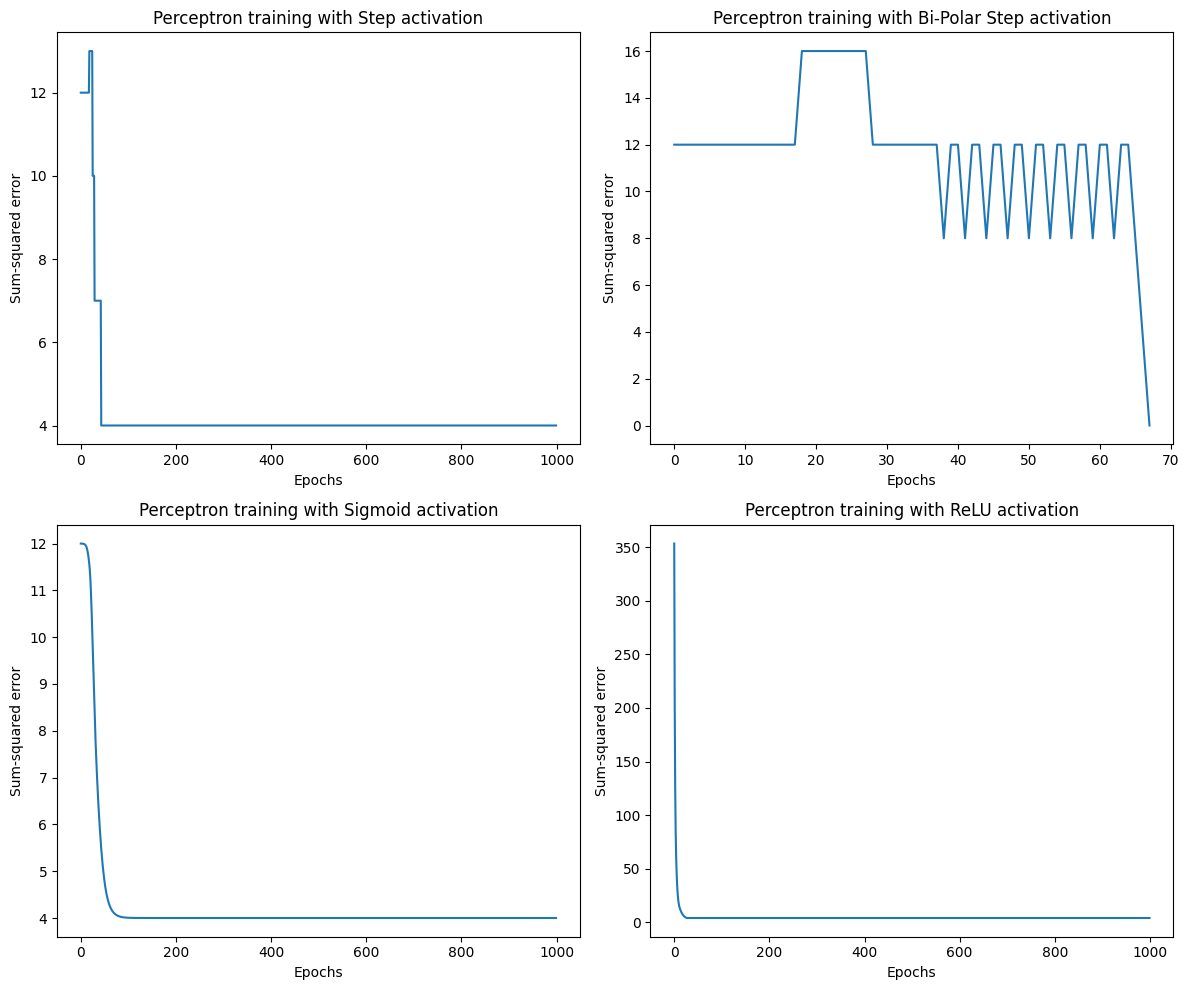

In [77]:
#A2

# Initialize weights and learning rate
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Training data for the AND gate
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_targets = np.array([-1, -1, -1, 1])  # Corrected for bipolar step activation

# Activation functions
def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return -1 if x < 0 else 1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Generic perceptron training function
def perceptron(activation_func):
    weights = initial_weights.copy()
    epochs = []
    errors = []
    max_epochs = 1000  # Maximum number of epochs to avoid infinite loop
    converged = False

    for epoch in range(max_epochs):
        error_sum = 0

        for i, input_data in enumerate(training_inputs):
            # Compute the weighted sum
            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]

            # Apply the current activation function
            prediction = activation_func(weighted_sum)

            # Update the weights
            error = training_targets[i] - prediction
            weights[1:] += learning_rate * error * input_data
            weights[0] += learning_rate * error

            error_sum += error ** 2

        epochs.append(epoch)
        errors.append(error_sum)

        # Check for convergence (no errors)
        if error_sum == 0:
            converged = True
            break

    return converged, epochs, errors, weights

# Activation functions to experiment with
activation_functions = [
    ("Step", step_function),
    ("Bi-Polar Step", bipolar_step_function),
    ("Sigmoid", sigmoid_function),
    ("ReLU", relu_function)
]

# Create subplots for four graphs
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Run perceptron for each activation function and plot results in separate subplots
for ax, (activation_name, activation_func) in zip(axs.ravel(), activation_functions):
    converged, epochs, errors, _ = perceptron(activation_func)

    # Plot the epochs against the error values
    ax.plot(epochs, errors)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Sum-squared error')
    ax.set_title(f'Perceptron training with {activation_name} activation')

    # Output the results
    if converged:
        print(f"{activation_name}: Converged in {len(epochs)} epochs.")
    else:
        print(f"{activation_name}: Maximum number of epochs reached. The perceptron did not converge.")

# Show all activation functions' results in separate graphs
plt.tight_layout()
plt.show()

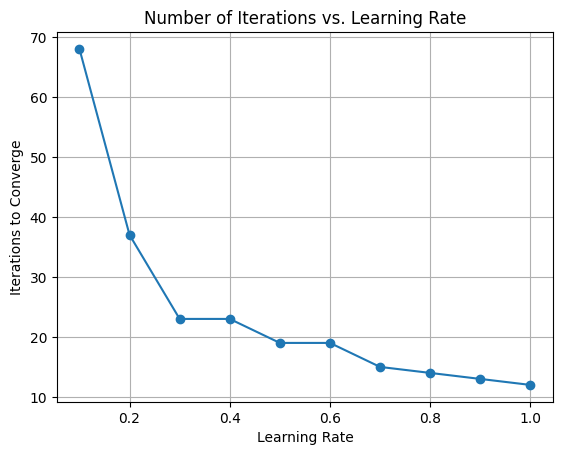

In [78]:
#A3

# Initialize weights and initial learning rates
initial_weights = np.array([10, 0.2, -0.75])
learning_rates = np.arange(0.1, 1.1, 0.1)
convergence_iterations = []

# Training data for the AND gate
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_targets = np.array([0, 0, 0, 1])

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Generic perceptron training function
def perceptron(learning_rate):
    weights = initial_weights.copy()
    max_epochs = 1000  # Maximum number of epochs to avoid infinite loop
    converged = False

    for epoch in range(max_epochs):
        error_sum = 0

        for i, input_data in enumerate(training_inputs):
            # Compute the weighted sum
            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]

            # Apply the step activation function
            prediction = step_function(weighted_sum)

            # Update the weights
            error = training_targets[i] - prediction
            weights[1:] += learning_rate * error * input_data
            weights[0] += learning_rate * error

            error_sum += error ** 2

        # Check for convergence (no errors)
        if error_sum == 0:
            converged = True
            break

    return converged, epoch + 1

# Run perceptron for each learning rate and record the number of iterations
for learning_rate in learning_rates:
    converged, iterations = perceptron(learning_rate)
    if converged:
        convergence_iterations.append(iterations)
    else:
        convergence_iterations.append(max_epochs)  # Maximum iterations if not converged

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, convergence_iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid()
plt.show()


XOR Gate: Maximum number of epochs reached. The perceptron didn't converge.


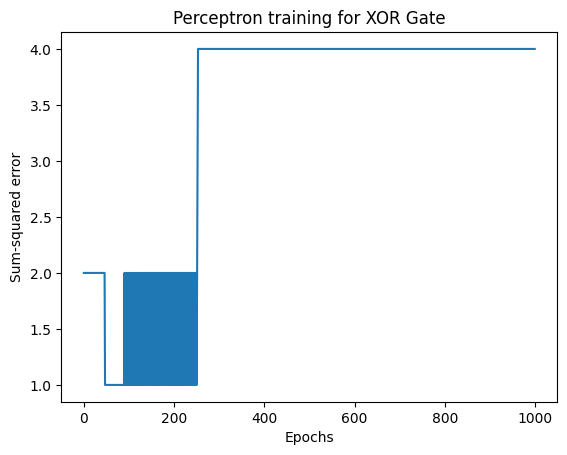

In [79]:
#A4 (i)

# Initialize weights and learning rate
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# XOR gate truth table
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_targets = np.array([0, 1, 1, 0])

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Generic perceptron training function
def perceptron(learning_rate):
    weights = initial_weights.copy()
    epochs = []
    errors = []
    max_epochs = 1000  # Maximum number of epochs to avoid infinite loop
    converged = False

    for epoch in range(max_epochs):
        error_sum = 0

        for i, input_data in enumerate(training_inputs):
            # Compute the weighted sum
            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]

            # Apply the step activation function
            prediction = step_function(weighted_sum)

            # Update the weights
            error = training_targets[i] - prediction
            weights[1:] += learning_rate * error * input_data
            weights[0] += learning_rate * error

            error_sum += error ** 2

        epochs.append(epoch)
        errors.append(error_sum)

        # Check for convergence (no errors)
        if error_sum == 0:
            converged = True
            break

    return converged, epoch + 1, epochs, errors

# Run perceptron for XOR gate
converged, iterations, epochs, errors = perceptron(learning_rate)

if converged:
    print(f"XOR Gate: Converged in {iterations} epochs.")
    print("Learned Weights:", initial_weights)
else:
    print("XOR Gate: Maximum number of epochs reached. The perceptron didn't converge.")

# Plot the number of epochs against the error values
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared error')
plt.title('Perceptron training for XOR Gate')
plt.show()


Step: Not converge in 1000 epochs.
Bipolar Step: Not converge in 1000 epochs.
Sigmoid: Not converge in 1000 epochs.
ReLU: Not converge in 1000 epochs.


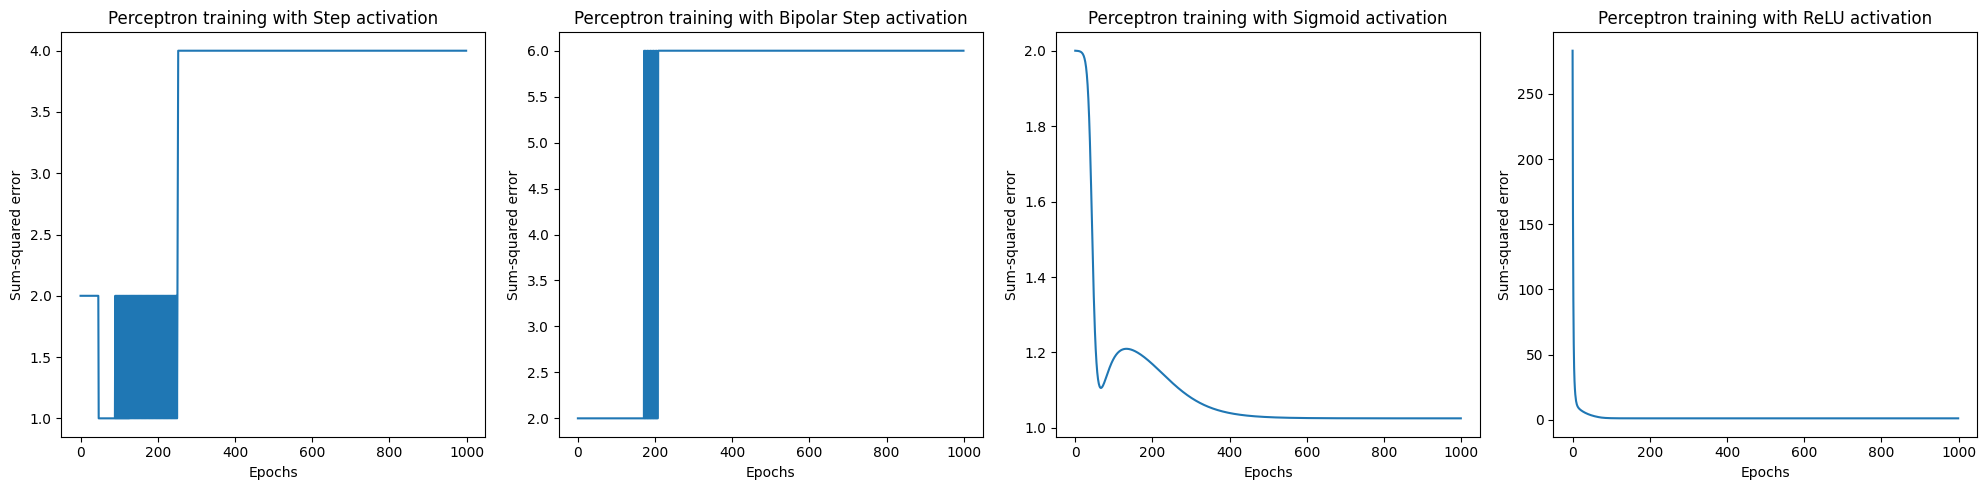

In [80]:
#A4 (ii)

# Initialize weights, learning rate, and XOR gate truth table
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_targets = np.array([0, 1, 1, 0])

# Activation functions
def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return -1 if x < 0 else 1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Generic perceptron training function
def perceptron(activation_func):
    weights = initial_weights.copy()
    epochs, errors = [], []
    max_epochs, converged = 1000, False

    for epoch in range(max_epochs):
        error_sum = 0
        for i, input_data in enumerate(training_inputs):
            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]
            prediction = activation_func(weighted_sum)
            error = training_targets[i] - prediction
            weights[1:] += learning_rate * error * input_data
            weights[0] += learning_rate * error
            error_sum += error ** 2

        epochs.append(epoch)
        errors.append(error_sum)
        if error_sum == 0:
            converged = True
            break

    return converged, epoch + 1, epochs, errors

# Activation functions to experiment with
activation_functions = [
    ("Step", step_function),
    ("Bipolar Step", bipolar_step_function),
    ("Sigmoid", sigmoid_function),
    ("ReLU", relu_function)
]

# Create subplots for four graphs
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Run perceptron for each activation function and plot results in separate subplots
for ax, (activation_name, activation_func) in zip(axs, activation_functions):
    converged, iterations, epochs, errors = perceptron(activation_func)

    # Plot the epochs against the error values
    ax.plot(epochs, errors)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Sum-squared error')
    ax.set_title(f'Perceptron training with {activation_name} activation')

    # Output the results
    status = "Converged" if converged else "Not converge"
    print(f"{activation_name}: {status} in {iterations} epochs.")

# Show all activation functions' results in separate graphs
plt.tight_layout()
plt.show()


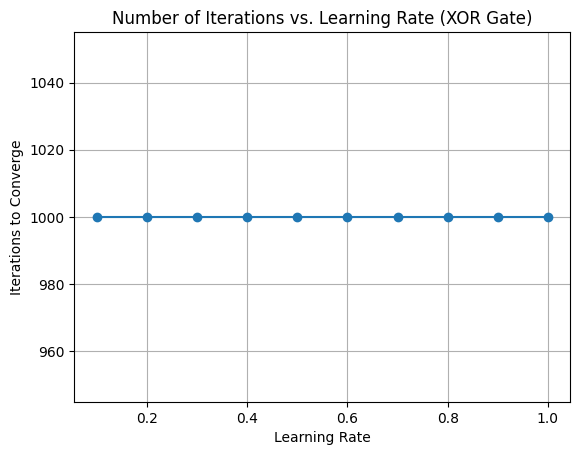

In [81]:
#A4 (iii)

# Initialize weights and initial learning rates
initial_weights = np.array([10, 0.2, -0.75])
learning_rates = np.arange(0.1, 1.1, 0.1)
convergence_iterations = []

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Generic perceptron training function
def perceptron(learning_rate):
    weights = initial_weights.copy()
    max_epochs = 1000  # Maximum number of epochs to avoid infinite loop
    converged = False

    for epoch in range(max_epochs):
        error_sum = 0

        for i, input_data in enumerate(training_inputs):
            # Compute the weighted sum
            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]

            # Apply the step activation function
            prediction = step_function(weighted_sum)

            # Update the weights
            error = training_targets[i] - prediction
            weights[1:] += learning_rate * error * input_data
            weights[0] += learning_rate * error

            error_sum += error ** 2

        # Check for convergence (no errors)
        if error_sum == 0:
            converged = True
            break

    return converged, epoch + 1

# Run perceptron for each learning rate and record the number of iterations
for learning_rate in learning_rates:
    converged, iterations = perceptron(learning_rate)
    if converged:
        convergence_iterations.append(iterations)
    else:
        convergence_iterations.append(max_epochs)  # Maximum iterations if not converged

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, convergence_iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate (XOR Gate)')
plt.grid()
plt.show()

Customer 1: High Value (Actual: High Value)
Customer 2: High Value (Actual: High Value)
Customer 3: High Value (Actual: High Value)
Customer 4: Low Value (Actual: Low Value)
Customer 5: High Value (Actual: High Value)
Customer 6: Low Value (Actual: Low Value)
Customer 7: High Value (Actual: High Value)
Customer 8: High Value (Actual: High Value)
Customer 9: Low Value (Actual: Low Value)
Customer 10: Low Value (Actual: Low Value)


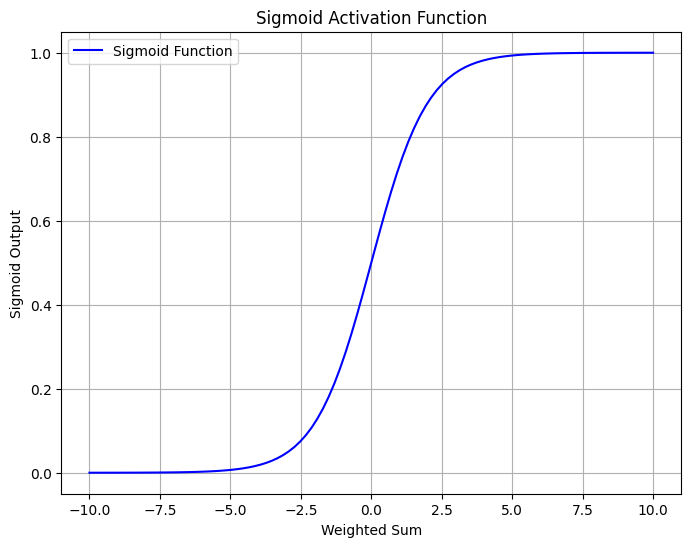

In [82]:
#A5

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size + 1)  # Add 1 for the bias term
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Include bias term
        return self.sigmoid(weighted_sum)

    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error
        return error

# Read customer data from a CSV file
df = pd.read_csv("customer_data.csv")

# Select the appropriate columns for features and targets
features = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
targets = df['High Value Tx?'].apply(lambda x: 1 if x == 'Yes' else 0).values

# Initialize and train the perceptron
perceptron = Perceptron(input_size=3, learning_rate=0.1)
epochs = 1000

# Lists to store errors and predictions for plotting
errors_list = []
predictions_list = []

for _ in range(epochs):
    total_error = 0
    predictions = []
    for i in range(len(features)):
        error = perceptron.train(features[i], targets[i])
        total_error += abs(error)
        predictions.append(perceptron.predict(features[i]))
    errors_list.append(total_error)
    predictions_list.append(predictions)
    if total_error == 0:
        break

for i in range(len(predictions)):
    print(f"Customer {i+1}: {'High Value' if predictions[i] >= 0.5 else 'Low Value'} (Actual: {'High Value' if targets[i] == 1 else 'Low Value'})")

# Plot sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid_values = perceptron.sigmoid(x)
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid_values, label='Sigmoid Function', color='blue')
plt.xlabel('Weighted Sum')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Activation Function')
plt.legend()
plt.grid(True)
plt.show()


Perceptron Accuracy: 1.24%
Pseudo-Inverse Accuracy: 100.00%


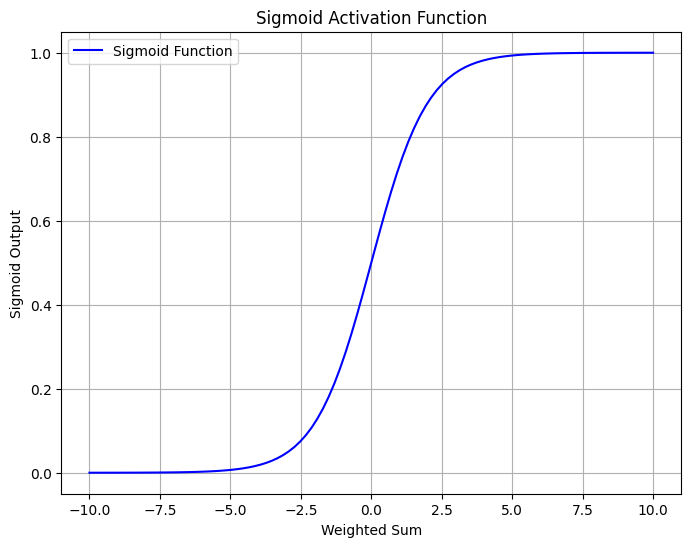

In [83]:
#A6

# Matrix Pseudo-Inverse Approach
# Add a bias term to the features

features_with_bias = np.column_stack((np.ones(len(features)), features))

# Use matrix pseudo-inverse to calculate the weights
pseudo_inverse_weights = np.linalg.pinv(features_with_bias).dot(targets)

# Make predictions using pseudo-inverse weights
pseudo_inverse_predictions = (features_with_bias.dot(pseudo_inverse_weights) >= 0.5).astype(int)

# Calculate accuracy for the pseudo-inverse approach
pseudo_inverse_accuracy = (pseudo_inverse_predictions == targets).mean()

# Print accuracy results
print(f"Perceptron Accuracy: {total_error * 100:.2f}%")
print(f"Pseudo-Inverse Accuracy: {pseudo_inverse_accuracy * 100:.2f}%")

# Plot sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid_values = perceptron.sigmoid(x)
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid_values, label='Sigmoid Function', color='blue')
plt.xlabel('Weighted Sum')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Activation Function')
plt.legend()
plt.grid(True)
plt.show()

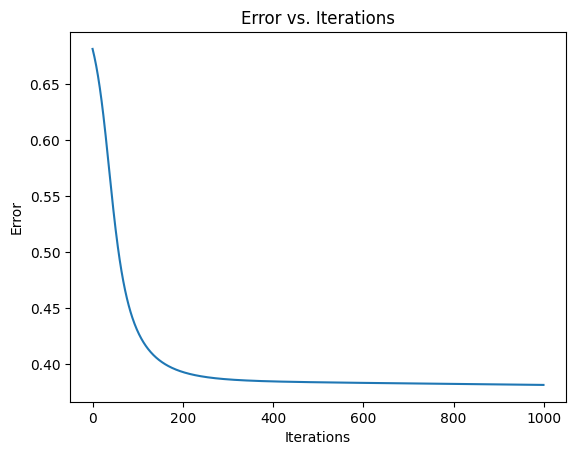

Test Results:
Input: [0 0], Output: [[0.26252603]]
Input: [0 1], Output: [[0.26744076]]
Input: [1 0], Output: [[0.27003482]]
Input: [1 1], Output: [[0.27305556]]


In [84]:
#A7 Developing Neural Network

# Define the Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input data for the AND gate (truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target values (output) for the AND gate
y = np.array([[0], [0], [0], [1]])

# Initialize weights and biases with random values
np.random.seed(0)
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
bias_hidden = np.random.uniform(size=(1, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
bias_output = np.random.uniform(size=(1, output_layer_size))

# Set the learning rate and maximum number of iterations
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Lists to store error values for plotting
errors = []

# Training loop
for i in range(max_iterations):
    # Forward propagation
    hidden_layer_input = X.dot(weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error:
        print(f"Converged after {i} iterations.")
        break

    errors.append(np.mean(np.abs(error)))

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Plot the error over iterations
plt.plot(range(len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations')
plt.show()

# Test the trained network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

print("Test Results:")
for input_data in test_data:
    hidden_layer_input = input_data.dot(weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    print(f"Input: {input_data}, Output: {output}")


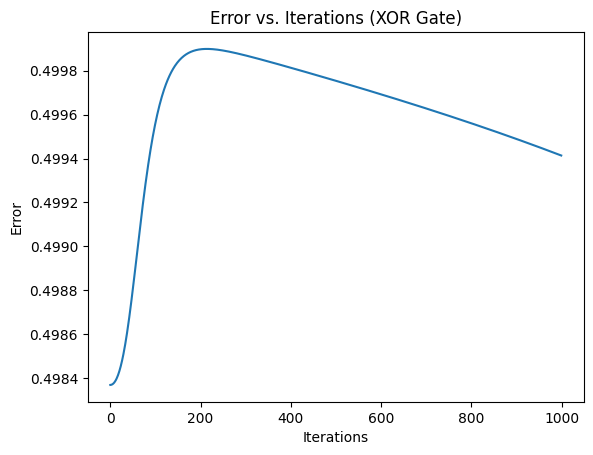

Test Results:
Input: [0 0], Output: [[0.49765543]]
Input: [0 1], Output: [[0.50218885]]
Input: [1 0], Output: [[0.50464493]]
Input: [1 1], Output: [[0.50683094]]


In [85]:
#A8

# Define the Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input data for the XOR gate (truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target values (output) for the XOR gate
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases with random values
np.random.seed(0)
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
bias_hidden = np.random.uniform(size=(1, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
bias_output = np.random.uniform(size=(1, output_layer_size))

# Set the learning rate and maximum number of iterations
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Lists to store error values for plotting
errors = []

# Training loop
for i in range(max_iterations):
    # Forward propagation
    hidden_layer_input = X.dot(weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error:
        print(f"Converged after {i} iterations.")
        break

    errors.append(np.mean(np.abs(error)))

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Plot the error over iterations
plt.plot(range(len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations (XOR Gate)')
plt.show()

# Test the trained network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

print("Test Results:")
for input_data in test_data:
    hidden_layer_input = input_data.dot(weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    print(f"Input: {input_data}, Output: {output}")


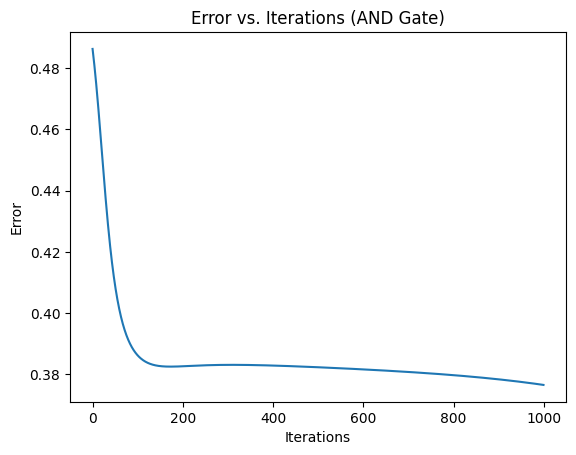

AND Gate Test Results:
Input: [0 0], Output: [[0.74627812 0.24695089]]
Input: [0 1], Output: [[0.72452048 0.27998956]]
Input: [1 0], Output: [[0.72836273 0.27624011]]
Input: [1 1], Output: [[0.7112304  0.30303931]]


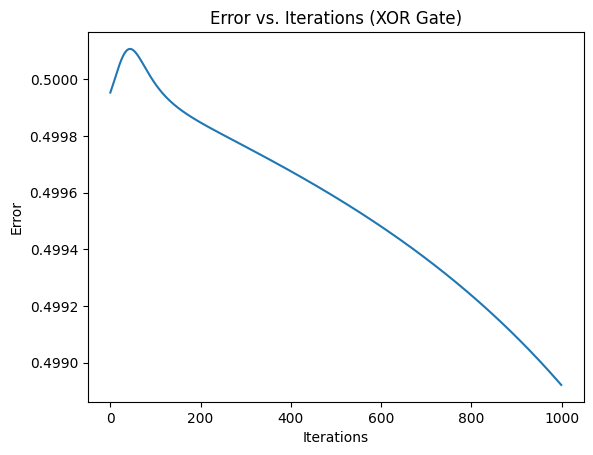

XOR Gate Test Results:
Input: [0 0], Output: [[0.50255636 0.48661024]]
Input: [0 1], Output: [[0.49472351 0.50534935]]
Input: [1 0], Output: [[0.49775793 0.50345907]]
Input: [1 1], Output: [[0.49268329 0.51631594]]


In [86]:
#A9 A1 & A2 with 2 output nodes

# Define the Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Function to train and test a neural network for AND or XOR gates
def train_and_test_gate(X, y, gate_name):
    # Initialize weights and biases with random values
    np.random.seed(0)
    input_layer_size = 2
    hidden_layer_size = 2
    output_layer_size = 2

    weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
    bias_hidden = np.random.uniform(size=(1, hidden_layer_size))
    weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
    bias_output = np.random.uniform(size=(1, output_layer_size))

    # Set the learning rate and maximum number of iterations
    learning_rate = 0.05
    max_iterations = 1000
    convergence_error = 0.002

    # Lists to store error values for plotting
    errors = []

    # Training loop
    for i in range(max_iterations):
        # Forward propagation
        hidden_layer_input = X.dot(weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
        output_layer_output = sigmoid(output_layer_input)

        # Calculate the error
        error = y - output_layer_output

        # Check for convergence
        if np.mean(np.abs(error)) <= convergence_error:
            print(f"{gate_name} Gate: Converged after {i} iterations.")
            break

        errors.append(np.mean(np.abs(error)))

        # Backpropagation
        d_output = error * sigmoid_derivative(output_layer_output)
        d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
        bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
        bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Plot the error over iterations
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title(f'Error vs. Iterations ({gate_name} Gate)')
    plt.show()

    # Test the trained network
    test_data = X

    print(f"{gate_name} Gate Test Results:")
    for input_data in test_data:
        hidden_layer_input = input_data.dot(weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output
        output = sigmoid(output_layer_input)

        print(f"Input: {input_data}, Output: {output}")

# Input data for the AND gate (truth table)
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

# Input data for the XOR gate (truth table)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Train and test the AND gate
train_and_test_gate(X_and, y_and, "AND")

# Train and test the XOR gate
train_and_test_gate(X_xor, y_xor, "XOR")


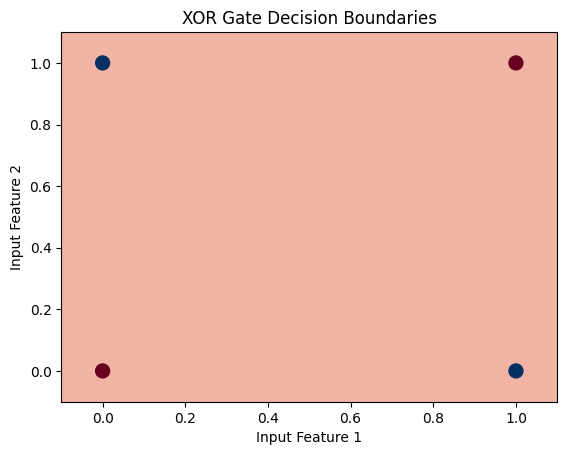

In [87]:
#A10 MLP Classifier() function
from sklearn.neural_network import MLPClassifier

# Define the XOR gate truth table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier for the XOR gate problem
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000, random_state=0)

# Train the classifier
xor_classifier.fit(X_xor, y_xor)

# Create a mesh grid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
Z = xor_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap=plt.cm.RdBu, s=100)
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.title('XOR Gate Decision Boundaries')
plt.show()


In [88]:
#A11 Use the MLPClassifier() function on dataset
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings

# Suppress the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Step 1: Read your Parkinson's dataset
data = pd.read_excel("Parkisons Dataset 1 Final.xlsx")

# Step 2: Preprocess the data
X = data.select_dtypes(include=['number'])  # Select numeric columns as features
y = data["status"]

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, learning_rate_init=0.01,
    random_state=42,)

# Fit the MLPClassifier with training data
mlp_classifier.fit(X_train, y_train)

# Step 5: Evaluate the classifier
y_pred = mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        32

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39

Confusion Matrix:
[[ 0  7]
 [ 0 32]]
